# Capstone Project: State High Schools in Rio de Janeiro

###                   For Applied Data Science Capstone Course by IBM/Coursera

## Table of Contents

1. [Introduction](#introduction)
2. [Data Collection](#data)
3. [Methodology](#methodology)
4. [Results and Discussion](#results)
5. [Conclusion](#conclusion)
6. [References](#reference)

## 1. Introduction<a name="introduction"></a>

<div style="text-align: justify">In Brazil, the Federal Constitution of 1988 determines “the progressive universalization of free secondary education "(article 208, item II). Furthermore, the National Education Guidelines and Bases’ Law, affects to the states the responsibility of “ensuring primary education and offering, with priority, secondary education "(article 10, section VI). This explains why, in 2008, almost 80% of all high school offers in the state of Rio de Janeiro (Rio) were provided by the state network (1).</div><br>

<div style="text-align: justify">Today, there is a real need to increase that offer, since in the last enrollment cycle – in February 2019 - twenty thousand students did not have their places ensured. To solve this problem the government estimates that more twenty-four schools need to be built in the whole state of Rio de Janeiro. The major demand being concentrated in its metropolitan region and, particularly, in the city of Rio (2).</div><br>
    
<div style="text-align: justify">In this sense, the present report aims to answer the question of which neighborhoods could beneficiate more from those new public high schools in the city of Rio de Janeiro. The main stakeholders are the Secretary of Education from the state and the citizens of Rio, mostly the ones that do not have economic conditions for paying for private schools. </div>


## 2. Data Collection <a name="data"></a>

<div style="text-align: justify">This is a complex problem that would need a lot of socioeconomic information along with real data from existing schools to know precisely the current offer and demand. Since all this data is not publicly available, the approach used here is a simplified one that considers three main aspects: (i) number of public high schools per neighborhood, (ii) total population per neighborhood and (iii) income level of each neighborhood. The sources used to gather that information are detailed below along with its limitations.</div>

**2.1. Data.Rio**
<div style="text-align: justify"> The limits of each neighborhood in the city of Rio were taken from the website [data.rio](http://www.data.rio/datasets/limite-bairro) controlled by the city hall. Data containing neighborhoods ID, coordinates and names were provided in the GeoJSON format. </div>

**2.2. Foursquare and Escol.as**
<div style="text-align: justify"> These two websites were used to find the location of state high schools in the city of Rio. It was possible to identify 250 out of 260 that currently exists. Data from [escol.as](https://www.escol.as/cidades/3242-rio-de-janeiro/categories/26-ensino-medio) were obtained by scraping the website and from foursquare the API was used to make requests that returned JSON files. </div>

**2.3. Brazilian Institute of Geography and Statistics (IBGE)**
<div style="text-align: justify">Demographic and economic information for each neighborhood were taken from the [IBGE](https://ibge.gov.br) (Brazilian Institute of Geography and Statistics) website. The most recent data available dates back to 2010 so it is important to note that some changes did take place in the meantime and are not covered here.  There are neighborhoods that were officially created after 2010 which explains why they do not have data. In order to work around this problem, those neighborhoods were deleted from the analysis. </div><br>

<div style="text-align: justify">Since there is no data concerning the number of people in high school age or the demand per neighborhood, the total population will be used as a proxy. The assumption behind this hypothesis is that the proportion of people in high school do not vary significantly between neighborhoods and the interest here is to compare them, so the absolute number is not very important. </div><br>
<div style="text-align: justify">To account for economic differences between neighborhoods the Human Development Index – Income (HDI-I) was chosen. This indicator calculates income on the basis of GDP per capita in the area in dollars PPC (Purchasing Power Parity). </div>

## 3. Methodology <a name="methodology"></a>

<div style="text-align: justify">The methodology will be explained in terms of the thinking process to build the code. The first main goal was to create a dataframe containing all the neighborhoods, their coordinates and them add three features:</div>

(i) total number of public high schools;<br> 
(ii) population;<br>
(iii) level of income (HDI-I).<br><br>


<div style="text-align: justify">To do so, the first step was to collect data from the city of Rio and save it into a first dataframe. Then, it was necessary to collect school data from Foursquare and Escol.as to have a database with all schools found. An analysis followed this step to select state high schools and group them by neighborhood, adding a column to the first dataframe to store that information. The incorporation of socioeconomic data was made manually using excel, since there were too many typos in the original data to scrape directly and merge with the existing dataframe.</div> <br>


<div style="text-align: justify">Once the dataframe was built, it was necessary to made an exploratory data analysis to identify missing data. It was decided to delete rows for which the population and/or HDI-I columns were zero since it meant that those neighborhoods were created after 2010 and, therefore, had no available data. Furthermore, data from these three features were normalized using the z-score method in order to be used in the subsequent step. To better understand the data, a scatter plot was made using the three features mentioned above.  </div><br>

<div style="text-align: justify">A cluster algorythm (k-means clustering) was chosen to identify neighborhoods with similar characteristics in terms of population, economic level and current number of public schools. From this analysis, it was possible to classify each cluster according to its main characteristics and to display them in a map. The goal was to identify the cluster which had the most vulnerable neighborhoods having more needs fom more public schools. However, more than one cluster presented those characteristics so another analysis layer was added. In this step, those neighborhoods identified in the clustering part were put together and the final criterion was the number of people per school. The hypothesis being that all identified areas would beneficiate from more schools, so the size of the area and the current offer would be the differencial between them. Supposing that it is needed to build twenty-five new schools,we calculated which vulnerable neighborhoods would need them most and presented in a map. </div>

Each step will be presented below.

In [40]:
#Importing libraries 

import requests
import pandas as pd
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim
import os
import numpy as np
from sklearn.cluster import KMeans 
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

**3.1. Collection of data from the city of Rio to know precisely the identification and coordinates of each neighborhood**

In [12]:
url = 'https://opendata.arcgis.com/datasets/8454eb0454b7424d89c61b67742286a1_3.geojson'
file = requests.get(url).json()

df = pd.DataFrame(columns = ['CodBairro','Bairro','Polygon Coordinates'])

for feature in file['features']:
    v1 = feature['properties']['CODBAIRRO']
    v2 = feature ['properties']['BAIRRO']
    v3 = feature['geometry']['coordinates']
    df = df.append({'CodBairro':v1,'Bairro':v2,'Polygon Coordinates':v3}, ignore_index = True)
    
df.sort_values(by = 'CodBairro', inplace = True)
df.reset_index(drop = True, inplace = True)

**3.2.1. Using Foursquare API for retrieving more schools in the city of Rio de Janeiro, Brazil.**

In [ ]:

## Defining Credentials
CLIENT_ID = 'X01BTOIQCP0R0VGYDKEAT3YE5BDCW5N2YJSIPN4K1BOZFLEZ' 
CLIENT_SECRET = '5KANAO01PJVDBMENFGEWHRRTWTQ5YH4XBOF1DO5TYAFTO2DY'
VERSION = '20190711' 
LIMIT = 100
radius = 500

#Latitude and Longitude from neighborhoods using Nominatim

df_bairro['Latitude Nominatim'] = None
df_bairro['Longitude Nominatim'] = None
       

def getLongLat (df, column_neighborhood, index_column_lat, index_column_lng):
    i = 0 
    for pc in df[column_neighborhood]:
        print(pc)
        address = pc + ',' + ' Rio de Janeiro, Brazil'
        geoloc = Nominatim(user_agent ='explorer_td2', timeout = None) #Convert an address into lat and long values
        location = geoloc.geocode(address)
        if location != None:
            lat = location.latitude
            lng = location.longitude
            print(lat, lng)
            df.iloc[i,index_column_lat] = lat
            df.iloc[i,index_column_lng] = lng
        i+=1
    return (df)

df_bairro = getLongLat(df_bairro,'Bairro', 3, 4)
# Read excel file previoulsy coded to save time
#df_bairro = pd.read_excel("df_bairros_RJ.xlsx")
df_bairro_full = df_bairro.copy()
df_bairro_full.dropna(inplace = True)

# Function to explore nearby venues  
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        result = requests.get(url).json()["response"]
        if result != None:
            results = result['groups'][0]['items']
        
        # return only relevant information for each nearby venue
            if results != None:
                print(name)
                venues_list.append([(
                        name, 
                        lat, 
                        lng, 
                        v['venue']['name'], 
                        v['venue']['location']['lat'], 
                        v['venue']['location']['lng'],  
                        v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# Getting venues in RJ
rj_venues = getNearbyVenues(names=df_bairro_full['Bairro'],
                                   latitudes=df_bairro_full['Latitude Nominatim'],
                                   longitudes=df_bairro_full['Longitude Nominatim']
                                  )

#Keep only schools
school_venue = rj_venues[rj_venues['Venue'].str.contains('School')] 

**3.2.2. Scraping high schools in Rio de Janeiro from escol.as**

In [8]:
#Criate new dataframe with schools' information

df_schools1 = pd.DataFrame(columns=['School Name','Classification','Address','Neighborhood'])

for j in range(1,24):
    if j == 1:
        url = 'https://www.escol.as/cidades/3242-rio-de-janeiro/categories/26-ensino-medio'
    else:
        url = 'https://www.escol.as/cidades/3242-rio-de-janeiro/categories/26-ensino-medio'+'?page='+str(j)
    
    page = requests.get(url)
    html_soup = BeautifulSoup(page.text,'html.parser')
    schools_cont = html_soup.find_all('div',class_='panel panel-default pull-left school-panel')
    
    for i in range(len(schools_cont)):
        school = schools_cont[i]
        name = school.find('div',class_='school-box-name').text
        address = school.find('p',class_='school-box-short-address').text                        
        neigh = school.find('p', class_='school-box-full-district').text
        df_schools1 = df_schools1.append({'School Name':name,'Address':address,'Neighborhood':neigh},ignore_index = True)

#Preparating the Dataframe
##Select parts of the text that will be useful later
for k in range(len(df_schools1)):
    word = df_schools1.iloc[k,0].split('-') 
    df_schools1.iloc[k,0] = word[0]
    df_schools1.iloc[k,1] = word[-1]
    df_schools1.iloc[k,3] = df_schools1.iloc[k,3].split(',')[0]

##Changing all the neighbordhoods assigned as Rio de Janeiro
df_problem = df_schools1[df_schools1['Neighborhood'].str.contains('Rio de Janeiro')]
ind = df_problem.index.values
#easier to change one by one since there are 6 occurrences 
new_names = ['Catete','Leblon','Penha Circular','Galeão','Caju','Tijuca']
for i in range(len(ind)):
    df_schools1.iloc[ind[i],3] = new_names[i]

**3.2.3. Selecting only state high schools from all the schools retrieved**

In [10]:
def get_state_hs (df, name_column_classification, name_column_school, name_column_neighborhood):
    
    """ This function takes a dataframe containing schools or other venues information and selects only state schools"""
    
    df_state_hs = pd.DataFrame(columns = ['School', 'Classification', 'Neighborhood'])
    for index, item in enumerate(df[name_column_classification]):
        if item == ' Estadual' or item == 'Public School':
            df_state_hs = df_state_hs.append({'School':df[name_column_school][index], 'Classification':'Estadual','Neighborhood':df[name_column_neighborhood][index]}, ignore_index = True)

    return (df_state_hs)


df_public_hs_1 = get_state_hs (df_schools1,'Classification', 'School Name', 'Neighborhood')
df_public_hs_2 = get_state_hs (rj_venues, 'Venue', 'Venue', 'Neighborhood')

**3.2.4. Aggregating schools per neighborhood**

In [16]:
df_complete = df_bairro.copy() 
df_complete['TotEnsinoMedioEstatal'] = 0

# Creating new df with coordinates from schools'neighborhoods to merge later with df_bairro
df_public_lat_lng = df_public_hs_1.copy()
df_public_lat_lng['Latitude'] = 0
df_public_lat_lng['Longitude'] = 0                
df_public_lat_lng = getLongLat(df_public_lat_lng,'Neighborhood', 3, 4)

# Schools that were not identified
l_zero = df_public_lat_lng[df_public_lat_lng['Latitude'] == 0].index.values
            
# Changing the name and getting coordinates again
name_new = ['Vila Kennedy','Tanque','Tanque','Quintino Bocaiuva','Portuguesa','Campo Grande']
k = 0
for i in (l_zero):
    df_public_lat_lng.iloc[i,2] = name_new[k]
    address = name_new[k] + ' Rio de Janeiro, Brazil'
    geoloc = Nominatim(user_agent ='explorer_td3', timeout = None)
    location = geoloc.geocode(address)
    lat = location.latitude
    lng = location.longitude
    df_public_lat_lng.iloc[i,3] = lat
    df_public_lat_lng.iloc[i,4] = lng
    k += 1
 

 
df_public_lat_lng.to_excel("df_public_lat_lng.xlsx", index = False) #Save to excel file to avoid running the code again

#Read excel file from the second time on
df_public_lat_lng = pd.read_excel("df_public_lat_lng.xlsx")


#Count schools per neighborhood
for index, item in enumerate(df_complete['Latitude Nominatim']):
    for j in range(len(df_public_lat_lng)):
            if (df_public_lat_lng.iloc[j,3] == item) and (df_public_lat_lng.iloc[j,4] == df_complete.iloc[index,4]):
                df_complete.iloc[index,5] = df_complete.iloc[index,5] + 1 # 237 from 250 schools identified, ok.

**3.3 Importing dataframe with socioeconomic features from local disc**

In [18]:
df_rj = pd.read_excel("df_complete_pop.xlsx") 

**3.4.1 Exploring the data: Visualization of features in a scatter plot **

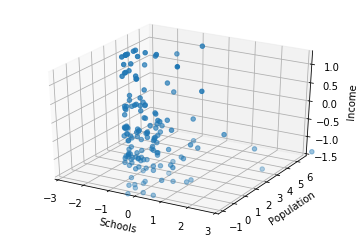

In [108]:
#Zooming in on the school axis to exclude outliers
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df_rj['Nb_escola_normalised'], df_rj['Pop_2010_normalised'], df_rj['IDHR_2010_normalised'])
ax.set_xlabel('Schools')
ax.set_ylabel('Population')
ax.set_zlabel('Income')
ax.set_xlim(-3, 3)
ax.set_zlim(-1.5,1.3)
plt.show()

** 3.4.2. Clustering Algorythm: K-means**

In [19]:
#Drop neighborhoods that have pop2010 and idh-r equal to zero (missing data) 
df_rj = df_rj[(df_rj[['Pop_2010','IDHR_2010']] != 0).all(axis = 1)] 
df_rj = df_rj.dropna() # 9 neighborhoods dropped

#Normalize the dataset using Standard Scaler (z-score)
std1 = np.std(df_rj['TotEnsinoMedioEstatal'])
df_rj['Nb_escola_normalised'] = ((df_rj['TotEnsinoMedioEstatal'] - df_rj['TotEnsinoMedioEstatal'].mean())/std1).round(3)

std2 = np.std(df_rj['Pop_2010'])
df_rj['Pop_2010_normalised'] = ((df_rj['Pop_2010'] - df_rj['Pop_2010'].mean())/std2).round(3)

std3 = np.std(df_rj['IDHR_2010'])
df_rj['IDHR_2010_normalised'] = ((df_rj['IDHR_2010'] - df_rj['IDHR_2010'].mean())/std3).round(3)
    

#Clustering
X = df_rj.values[:,8:]
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 50)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[3 3 3 3 0 3 0 0 0 3 3 0 4 4 4 0 0 4 4 4 4 4 4 4 4 4 4 4 4 0 2 4 4 4 4 3 0
 0 0 2 0 3 3 3 0 0 0 0 0 3 3 3 3 0 0 0 0 0 4 0 0 0 0 0 0 0 3 0 3 0 0 2 3 0
 0 3 3 0 2 3 3 3 3 0 3 3 0 0 0 0 0 0 0 4 0 0 0 0 3 3 3 3 3 3 3 3 3 3 2 2 0
 3 3 3 0 2 0 0 0 4 0 2 3 3 3 4 4 0 0 0 4 3 2 2 1 2 3 1 3 3 2 2 2 3 2 0 0 3
 3 3 2 0 3]


**3.4.3. Create cluster label column in the main dataframe and examine clusters**

In [23]:
#Create column with cluster labels in the dataframe df_rj
df_rj.insert(2, 'Cluster Labels', labels)

#Examine clusters
cluster0 = df_rj.loc[(df_rj['Cluster Labels'] == 0),:]
cluster1 = df_rj.loc[(df_rj['Cluster Labels'] == 1),:]
cluster2 = df_rj.loc[(df_rj['Cluster Labels'] == 2),:] #This one would benefit from more schools
cluster3 = df_rj.loc[(df_rj['Cluster Labels'] == 3),:]
cluster4 = df_rj.loc[(df_rj['Cluster Labels'] == 4),:]

In [25]:
cluster0.head()

,CodBairro,Bairro,Cluster Labels,Polygon Coordinates,Latitude Nominatim,Longitude Nominatim,TotEnsinoMedioEstatal,Pop_2010,IDHR_2010,Nb_escola_normalised,Pop_2010_normalised,IDHR_2010_normalised
4,5,Centro,0,"[[[[-43.178330741495564, -22.89257904703022], ...",-22.904393,-43.183065,2,41142.0,0.850,0.191,0.050,0.446
6,7,Rio Comprido,0,"[[[-43.21012221062528, -22.915832359165087], [...",-22.927945,-43.208857,3,43764.0,0.838,0.590,0.108,0.325
7,8,Cidade Nova,0,"[[[-43.195156242506755, -22.911748914681542], ...",-22.910051,-43.201756,0,5466.0,0.851,-0.609,-0.735,0.456
8,9,Estácio,0,"[[[-43.19715480724273, -22.91422491033128], [-...",-22.916626,-43.203630,0,17189.0,0.778,-0.609,-0.477,-0.280
13,14,Santa Teresa,0,"[[[-43.191044630285916, -22.913382603914883], ...",-22.921399,-43.188214,1,40926.0,0.867,-0.209,0.045,0.617


In [26]:
cluster1.head()

,CodBairro,Bairro,Cluster Labels,Polygon Coordinates,Latitude Nominatim,Longitude Nominatim,TotEnsinoMedioEstatal,Pop_2010,IDHR_2010,Nb_escola_normalised,Pop_2010_normalised,IDHR_2010_normalised
140,141,Bangu,1,"[[[-43.487172994385624, -22.848805326665932], ...",-22.875305,-43.464880,12,243125.0,0.723,4.187,4.494,-0.835
143,144,Campo Grande,1,"[[[-43.51515139864348, -22.852286612393538], [...",-22.902953,-43.559129,23,328370.0,0.751,8.582,6.369,-0.553


In [29]:
cluster2.head()

,CodBairro,Bairro,Cluster Labels,Polygon Coordinates,Latitude Nominatim,Longitude Nominatim,TotEnsinoMedioEstatal,Pop_2010,IDHR_2010,Nb_escola_normalised,Pop_2010_normalised,IDHR_2010_normalised
32,33,Tijuca,2,"[[[-43.21606350696351, -22.91313137376377], [-...",-22.933216,-43.238145,1,163805.0,0.957,-0.209,2.749,1.525
42,43,Penha,2,"[[[-43.25648886199383, -22.83362760627041], [-...",-22.838113,-43.276445,5,78678.0,0.761,1.389,0.876,-0.452
75,76,Irajá,2,"[[[-43.31721539365165, -22.819546334546633], [...",-22.835113,-43.323362,7,96382.0,0.801,2.189,1.265,-0.048
82,83,Madureira,2,"[[[-43.32430021516191, -22.86464105444588], [-...",-22.871658,-43.337198,5,50106.0,0.781,1.389,0.247,-0.250
113,114,Pavuna,2,"[[[-43.3277501434501, -22.802222255131884], [-...",-22.812193,-43.359281,3,97350.0,0.717,0.590,1.287,-0.896


In [27]:
cluster3.head()

,CodBairro,Bairro,Cluster Labels,Polygon Coordinates,Latitude Nominatim,Longitude Nominatim,TotEnsinoMedioEstatal,Pop_2010,IDHR_2010,Nb_escola_normalised,Pop_2010_normalised,IDHR_2010_normalised
0,1,Saúde,3,"[[[-43.181151633502964, -22.89543028430424], [...",-22.897184,-43.184154,0,2749.0,0.736,-0.609,-0.795,-0.704
1,2,Gamboa,3,"[[[-43.18791509598939, -22.89312172213513], [-...",-22.897749,-43.192904,0,13108.0,0.736,-0.609,-0.567,-0.704
2,3,Santo Cristo,3,"[[[-43.194498082949806, -22.903378003392305], ...",-22.900766,-43.203393,1,12330.0,0.736,-0.209,-0.584,-0.704
3,4,Caju,3,"[[[[-43.22522402819599, -22.874652369739056], ...",-22.880306,-43.221494,3,20477.0,0.685,0.590,-0.405,-1.218
5,6,Catumbi,3,"[[[-43.19415000396142, -22.917312941644308], [...",-22.919662,-43.199064,1,12556.0,0.738,-0.209,-0.579,-0.684


In [28]:
cluster4.head()

,CodBairro,Bairro,Cluster Labels,Polygon Coordinates,Latitude Nominatim,Longitude Nominatim,TotEnsinoMedioEstatal,Pop_2010,IDHR_2010,Nb_escola_normalised,Pop_2010_normalised,IDHR_2010_normalised
14,15,Flamengo,4,"[[[-43.16890822998482, -22.924667397921247], [...",-22.933984,-43.174574,0,50043.0,1.000,-0.609,0.246,1.959
15,16,Glória,4,"[[[-43.168322290829295, -22.910956592742583], ...",-22.918322,-43.173923,1,9661.0,0.954,-0.209,-0.643,1.495
16,17,Laranjeiras,4,"[[[-43.181485646457666, -22.929512362994547], ...",-22.934317,-43.187816,1,45554.0,1.000,-0.209,0.147,1.959
19,20,Botafogo,4,"[[[-43.17831346247171, -22.94005791203437], [-...",-22.948845,-43.179829,1,82890.0,0.979,-0.209,0.968,1.747
20,21,Humaitá,4,"[[[-43.19631681775424, -22.95270926656568], [-...",-22.954641,-43.200480,0,13285.0,1.000,-0.609,-0.563,1.959


**3.4.4. Classifying each cluster according to its characteristics**

In [78]:
cluster_classes = pd.DataFrame({'Cluster':[0,1,2,3,4],'Income Class':['High','Medium','Diverse','Low','Extremely High'], 'Population Class':['Medium','Extremely high','Medium/High','Low/Medium','Medium/High']})
cluster_classes.set_index('Cluster', inplace = True)
cluster_classes

,Income Class,Population Class
Cluster,,
0,High,Medium
1,Medium,Extremely high
2,Diverse,Medium/High
3,Low,Low/Medium
4,Extremely High,Medium/High


**3.4.5. Visualizing the resulting clusters**

In [110]:
#create map
latitude = -22.9201
longitude = -43.3307
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(clusterNum)
ys = [i + x + (i*x)**2 for i in range(clusterNum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_rj['Latitude Nominatim'], df_rj['Longitude Nominatim'], df_rj['Bairro'],df_rj['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

**3.5.1. Applying criteria to make the final choice**

From the classification of clusters made above, one can infer that the most relevant for this problem are clusters 1, 2 and 3. From this analysis we will take a closer look into these three clusters in order to make a better final decision.

To do so, we will build another dataframe containing all data from clusters 1 and 3 along with low income neighborhoods from cluster 2. Then, the number of people per school will be calculated for five new scenarios: with one, two, three, four and five new schools. Finally, the twenty-five highest numbers of people per school considering all five scenarios were selected to build the final dataframe with the decision and its map.

In [99]:
frames = [cluster1, cluster3, cluster2.loc[(cluster2['IDHR_2010'] < 0.750),:]]
df_fin = pd.concat(frames)
      
# What if each neighborhood had another school?
df_fin['People per school with another school hyp.'] = 0

for index, item in enumerate(df_fin['TotEnsinoMedioEstatal']):
    item = item + 1
    df_fin.iloc[index,12] = df_fin.iloc[index,7]/item

df_fin.sort_values(by ='People per school with another school hyp.', ascending = False, inplace = True)

# What if each neighborhood had another two schools?
df_fin['People per school with more two schools hyp.'] = 0

for index, item in enumerate(df_fin['TotEnsinoMedioEstatal']):
    item = item + 2
    df_fin.iloc[index,13] = df_fin.iloc[index,7]/item

# What if each neighborhood had another 3 schools?
df_fin['People per school with more three schools hyp.'] = 0

for index, item in enumerate(df_fin['TotEnsinoMedioEstatal']):
    item = item + 3
    df_fin.iloc[index,14] = df_fin.iloc[index,7]/item
               
# What if each neighborhood had another 4 schools?
df_fin['People per school with more four schools hyp.'] = 0

for index, item in enumerate(df_fin['TotEnsinoMedioEstatal']):
    item = item + 4
    df_fin.iloc[index,15] = df_fin.iloc[index,7]/item 
               
# What if each neighborhood had another 5 schools?
df_fin['People per school with more five schools hyp.'] = 0

for index, item in enumerate(df_fin['TotEnsinoMedioEstatal']):
    item = item + 5
    df_fin.iloc[index,16] = df_fin.iloc[index,7]/item                 
               
               
# Select 25 highest numbers
col5 = df_fin['People per school with more five schools hyp.'].tolist()
col4 = df_fin['People per school with more four schools hyp.'].tolist()
col3 = df_fin['People per school with more three schools hyp.'].tolist()
col2 = df_fin['People per school with more two schools hyp.'].tolist()
col1 = df_fin['People per school with another school hyp.'].tolist()


cols = (col1 + col2 + col3 + col4 + col5)
cols.sort(reverse = True)
final_col = cols[0:25]

# Find neighborhoods corresponding to each value
df_5 = df_fin[df_fin['People per school with more five schools hyp.'] >= 23047.666666666668]
df_4 = df_fin[df_fin['People per school with more four schools hyp.'] >= 23047.666666666668]
df_3 = df_fin[df_fin['People per school with more three schools hyp.'] >= 23047.666666666668]
df_2 = df_fin[df_fin['People per school with more two schools hyp.'] >= 23047.666666666668]
df_1 = df_fin[df_fin['People per school with another school hyp.'] >= 23047.666666666668]

# Create another dataframe to store the results:
i = 0
df_decision = df_1.loc[:,['Bairro','Latitude Nominatim', 'Longitude Nominatim', 'TotEnsinoMedioEstatal',
       'Pop_2010', 'IDHR_2010']]
df_decision['Nb_additional_schools'] = 1
           
           
frames2 = [df_2, df_3, df_4,df_5]
df_frames = pd.concat(frames2)

for i in range(len(df_frames)):
    for index, item in enumerate(df_decision['Bairro']):
        if df_frames.iloc[i,1] == item:
            df_decision.iloc[index, 6] = df_decision.iloc[index, 6]+1

#rename columns from df_decision
df_decision.rename(columns={'Bairro':'Neighborhood','Latitude Nominatim':'Latitude', 'Longitude Nominatim':'Longitude', 'TotEnsinoMedioEstatal':'Current_nb_schools','IDHR_2010': 'HDII_2010'}, inplace = True)
df_decision.sort_values(by= 'Nb_additional_schools',ascending = False, inplace = True)
df_decision

,Neighborhood,Latitude,Longitude,Current_nb_schools,Pop_2010,HDII_2010,Nb_additional_schools
156,Maré,-22.859237,-43.242573,1,129770.0,0.646,4
153,Rocinha,-22.987790,-43.247929,0,69356.0,0.673,3
155,Complexo do Alemão,-22.860610,-43.273751,0,69143.0,0.637,3
114,Jacarepaguá,-22.966504,-43.371319,3,146392.0,0.742,3
141,Senador Camará,-22.898398,-43.489157,2,105515.0,0.695,2
47,Vigário Geral,-22.809533,-43.309704,0,41820.0,0.723,1
154,Jacarezinho,-22.887507,-43.257879,0,37839.0,0.638,1
38,Manguinhos,-22.879974,-43.245722,0,36160.0,0.648,1
144,Senador Vasconcelos,-22.895368,-43.528857,0,30600.0,0.726,1
129,Vargem Pequena,-22.981819,-43.457812,0,27250.0,0.713,1


**3.5.2. Mapping chosen neighborhoods**

In [107]:
#create map
latitude = -22.9201
longitude = -43.3307
map_final = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to the map
markers_colors = []
for lat, lon, poi in zip(df_decision['Latitude'], df_decision['Longitude'], df_decision['Neighborhood']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.5).add_to(map_final)
       
map_final


## 4. Results and Discussion <a name="results">

<div style="text-align: justify">Looking at the results, it is possible to identify the most vulnerable areas as being important *favelas*. This seems coherent since those areas are densely populated and have a low level of income. Furthermore, they are characterised as having rapid growth rates that are usually not controlled, inducing the lack of adequate infrastructure. That being said, it is extremely important to improve their living conditions and one relevant factor is the offer of public schools.</div> <br>

<div style="text-align: justify">Depending on the features analysed and the method used, the results can be different. In this sense, it is impotant to state that the analysis made here is a simplified one taking into account only publicly available data. There are some limitations in this approach that need to be explicitated:
(i) Most of data dates back to 2010 which is considerably outdated today;
(ii) Using the population as a proxy for the demand can induce some errors if the pyramid of ages of neighborhoods differ significantly;
(iii) Only three factors were considered and one kind of clustering algorythm tested.</div> 

Recommended zones should therefore be considered only as a starting point for more detailed analysis which could eventually result in location which has also other factors taken into account and all other relevant conditions met.


## 5. Conclusion <a name="conclusion">

<div style="text-align: justify">The aim of this project was to help the government of the state of Rio de Janeiro to find the best locations to build another set of twenty-five public high schools in order to supply the current need. The analysis took into consideration the current number of public high schools, the population and the level of income of each neighborhood as proxys of the offer and the demand. Clustering of those locations was then performed in order to create major zones of interest (containing greatest number of potential locations) that were used as starting points for final exploration.</div> <br>

<div style="text-align: justify">The criterion used for selecting twenty-five potential new sites for the schools was the density per school in the case of the existence of more schools in each preselected area. Those with the highest demand in populational terms were then chosen. Based on these criteria and the features analysed, it was possible to identify fourteen vulnerable neighborhoods. For some of them, more than one school would be needed to balance the demand and the offer.</div> 


## 6. References <a name="reference">

1. MPRJ. Plano Estadual de Educacão do Rio de Janeiro. Rio de Janeiro : Ministério Público do Rio de Janeiro.
2. Melo, Maria Luisa de. Falta de 20 mil vagas na rede estadual afeta alunos das zonas Oeste, Norte e interior. O Dia. [Online] O Dia, 21 de 02 de 2019. [Citado em: 19 de 07 de 2019.] https://odia.ig.com.br/rio-de-janeiro/2019/02/5621427-falta-de-20-mil-vagas-na-rede-estadual-afeta-alunos-das-zonas-oeste--norte-e-interior.html.

